In [1]:
%matplotlib inline
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import sys
import pandas as pd
import os
import my_functions

In [2]:
# Read in cfg file
cfg = my_functions.read_config('./cfg/calibrated_1961_1970.Mohs_v1.Leop_v1.natural/Tennessee.usgs03571850.cfg')

dpi = 200 # figure dpi

In [3]:
#=======================================================#
# Preprocess
#=======================================================#
#-------------------------------------------------

# list of start date shown on the plot for each time series to plot (should be complete water years)
hist_plot_start_date = dt.datetime(cfg['PLOT']['hist_plot_start_date'][0],
                                   cfg['PLOT']['hist_plot_start_date'][1],
                                   cfg['PLOT']['hist_plot_start_date'][2])  # historical
control_plot_start_date = dt.datetime(cfg['PLOT']['control_plot_start_date'][0],
                                      cfg['PLOT']['control_plot_start_date'][1],
                                      cfg['PLOT']['control_plot_start_date'][2])  # control
list_future_plot_start_date = [dt.datetime(cfg['PLOT']['future_plot_start_date_1'][0],
                                           cfg['PLOT']['future_plot_start_date_1'][1],
                                           cfg['PLOT']['future_plot_start_date_1'][2]),  # future 1, 2020s
                               dt.datetime(cfg['PLOT']['future_plot_start_date_2'][0],
                                           cfg['PLOT']['future_plot_start_date_2'][1],
                                           cfg['PLOT']['future_plot_start_date_2'][2]),  # future 2, 2050s
                               dt.datetime(cfg['PLOT']['future_plot_start_date_3'][0],
                                           cfg['PLOT']['future_plot_start_date_3'][1],
                                           cfg['PLOT']['future_plot_start_date_3'][2])]  # future 3, 2080s # list of end date shown on the plot for each time series to plot (should be complete water years)
hist_plot_end_date = dt.datetime(cfg['PLOT']['hist_plot_end_date'][0],
                                 cfg['PLOT']['hist_plot_end_date'][1],
                                 cfg['PLOT']['hist_plot_end_date'][2])  # historical
control_plot_end_date = dt.datetime(cfg['PLOT']['control_plot_end_date'][0],
                                    cfg['PLOT']['control_plot_end_date'][1],
                                    cfg['PLOT']['control_plot_end_date'][2])  # control
list_future_plot_end_date = [dt.datetime(cfg['PLOT']['future_plot_end_date_1'][0],
                                         cfg['PLOT']['future_plot_end_date_1'][1],
                                         cfg['PLOT']['future_plot_end_date_1'][2]),  # future 1, 2020s
                               dt.datetime(cfg['PLOT']['future_plot_end_date_2'][0],
                                           cfg['PLOT']['future_plot_end_date_2'][1],
                                           cfg['PLOT']['future_plot_end_date_2'][2]),  # future 2, 2050s
                               dt.datetime(cfg['PLOT']['future_plot_end_date_3'][0],
                                           cfg['PLOT']['future_plot_end_date_3'][1],
                                           cfg['PLOT']['future_plot_end_date_3'][2])]  # future 3, 2080s

#-------------------------------------------------

hist_label = cfg['PLOT']['hist_label'] # 'Historical, 1980s'
control_label = cfg['PLOT']['control_label'] # 'Control, 1980s, 5 GCM avg.'
list_future_label = cfg['PLOT']['list_future_label']  # ['2020s', '2050s', '2080s']

#hist_style = cfg['PLOT']['hist_style']  # 'k-'
#control_style = cfg['PLOT']['control_style']  #  'b-'
#list_future_style = cfg['PLOT']['list_future_style']   # ['y--', 'g--', 'r--']

#hist_color = cfg['PLOT']['hist_color']  # 'k'
#control_color = cfg['PLOT']['control_color']  # 'b'
#list_future_color = cfg['PLOT']['list_future_color']  # ['y', 'g', 'r']

nfuture = cfg['PLOT']['nfuture']
#-------------------------------------------------

period_to_plot = 1  # 0, 1 or 2 to specify which future period to plot

# Specify plot styles
control_ls = '-'
rcp45_ls = '--'
rcp85_ls = '--'

control_color = 'k'
rcp45_color = 'b'
rcp85_color = 'r'

#-------------------------------------------------

model_info = cfg['PLOT']['model_info']
model_info = model_info.replace("\\n", "\n")

In [5]:
#========================================================
# Load data
#========================================================
print 'Loading data...'
s_rcp45 = my_functions.read_Lohmann_route_daily_output(\
                            cfg['GCM_AVG']['path'].replace('<RCP>', 'rcp45'))
s_rcp85 = my_functions.read_Lohmann_route_daily_output(\
                            cfg['GCM_AVG']['path'].replace('<RCP>', 'rcp85'))

Loading data...


In [6]:
#========================================================
# Select data to be plotted
#========================================================
# Select control period
control_s_to_plot = s_rcp45.truncate(before=control_plot_start_date, \
                                     after=control_plot_end_date)
# Select future periods
list_future_s_to_plot_rcp45 = []
list_future_s_to_plot_rcp85 = []
for i in range(nfuture):
    # rcp45
    future_s_to_plot_rcp45 = s_rcp45.truncate(before=list_future_plot_start_date[i], \
                                               after=list_future_plot_end_date[i])
    list_future_s_to_plot_rcp45.append(future_s_to_plot_rcp45)
    # rcp85
    future_s_to_plot_rcp85 = s_rcp85.truncate(before=list_future_plot_start_date[i], \
                                               after=list_future_plot_end_date[i])
    list_future_s_to_plot_rcp85.append(future_s_to_plot_rcp85)

# Put all data to be plotted into a df (control, future_rcp45, future_rcp85)
df_to_plot = pd.concat([control_s_to_plot, \
                        list_future_s_to_plot_rcp45[period_to_plot], \
                        list_future_s_to_plot_rcp85[period_to_plot]], \
                       keys=['control', 'rcp45', 'rcp85'], axis=1)

plotting...


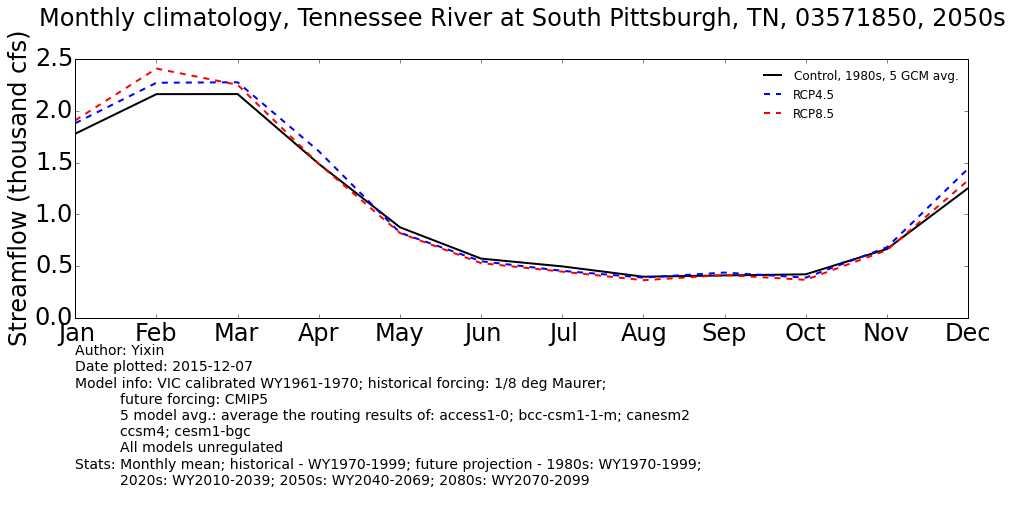

In [8]:
#========================================================
# plot
#========================================================
print 'plotting...'
#============== plot seasonality data ===============#
# Calculate seasonality
df_season_to_plot = my_functions.calc_ts_stats_by_group(\
                        df_to_plot, 'month', 'mean') # index is 1-12 (month)
# Plot
fig = plt.figure(figsize=(16,6))
ax = plt.subplot()
fig, ax = my_functions.plot_time_series(fig, ax, plot_date=False, \
        df_data=df_season_to_plot/1000.0, \
        list_style=[control_ls]+[rcp45_ls]+[rcp85_ls], \
        list_color=[control_color]+[rcp45_color]+[rcp85_color], \
        list_lw=[2,2,2], \
        list_label=[control_label]+['RCP4.5', 'RCP8.5'], \
        plot_start=1, plot_end=12, \
        ylabel='Streamflow (thousand cfs)', \
        title='Monthly climatology, {}, {}\n'.format(cfg['PLOT']['title'], \
                                            list_future_label[period_to_plot]),
        fontsize=24, legend_loc='upper right', \
        xtick_location=range(1,13), \
        xtick_labels=['Jan','Feb','Mar','Apr','May','Jun',\
                      'Jul','Aug','Sep','Oct','Nov','Dec'], \
        add_info_text=True, model_info=model_info, \
        stats='Monthly mean; historical - WY{}-{}; future projection - 1980s: WY1970-1999; \n          2020s: WY2010-2039; 2050s: WY2040-2069; 2080s: WY2070-2099'.format(hist_plot_start_date.year+1, hist_plot_end_date.year))

ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

fig = plt.savefig('{}.{}.flow.seas.png'\
                        .format(cfg['OUTPUT']['output_plot_basepath'], \
                                list_future_label[period_to_plot]), \
                  format='png', dpi=dpi)


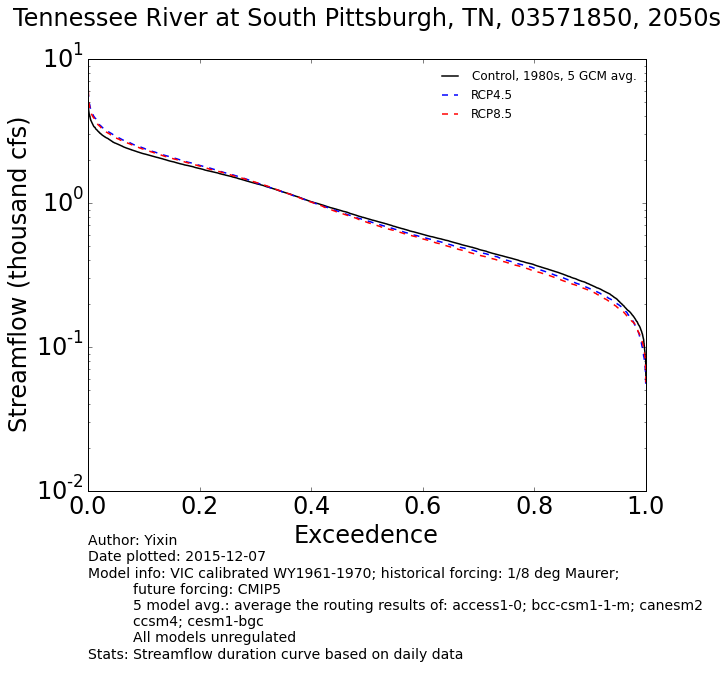

In [10]:
#============== plot duration curve ===============#
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()
fig, ax = my_functions.plot_duration_curve(fig, ax, \
        df_data=df_to_plot/1000, \
        list_style=[control_ls]+[rcp45_ls]+[rcp85_ls], \
        list_color=[control_color]+[rcp45_color]+[rcp85_color], \
        list_lw=[1.5, 1.5, 1.5], \
        list_label=[control_label]+['RCP4.5', 'RCP8.5'], \
        ylog=True, xlim=None, ylim=None, \
        xlabel='Exceedence', ylabel='Streamflow (thousand cfs)', \
        title='{}, {}\n'.format(cfg['PLOT']['title'], list_future_label[period_to_plot]), \
        fontsize=24, \
        legend_loc='upper right', add_info_text=True, model_info=model_info, \
        stats='Streamflow duration curve based on daily data', show=False)

ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

fig = plt.savefig('{}.future.flow_duration.png'\
                        .format(cfg['OUTPUT']['output_plot_basepath']), \
                  format='png', dpi=dpi)